In [1]:
import pandas as pd

In [2]:
# data/253425.csvを読み込む
# 1行目はファンド名、2行目がヘッダー、3行目からデータ
# 文字コードはShift_JIS
df = pd.read_csv('data/253425.csv', encoding='shift_jis', header=1)

In [3]:
# 基準価額（分配金再投資）(円)列から日次リターンを計算して追加
df['日次リターン'] = df['基準価額（分配金再投資）(円)'].pct_change() * 100

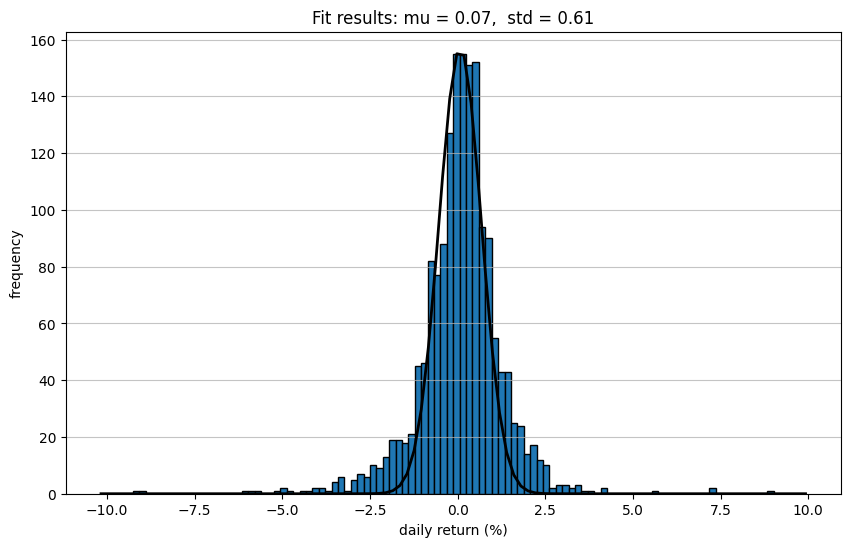

In [18]:
# 日次リターンのヒストグラムを表示
#　正規分布に近い形になるはず
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
plt.figure(figsize=(10, 6))
plt.title('histogram of Daily Returns')
plt.xlabel('daily return (%)')
plt.ylabel('frequency')  
plt.hist(df['日次リターン'].dropna(), bins=100, edgecolor='black')
plt.grid(axis='y', alpha=0.75)

mu = df['日次リターン'].mean()  # 平均
sigma = df['日次リターン'].std()/2  # 標準偏差
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

plt.plot(x, p * max(np.histogram(df['日次リターン'].dropna(), bins=100)[0]) / max(p), 'k', linewidth=2)
plt.title('Fit results: mu = %.2f,  std = %.2f' % (mu, sigma))

plt.show()

In [13]:
# 日次リターンの対数リターンを計算して追加
df['日次対数リターン'] = np.log1p(df['日次リターン'] / 100) * 100

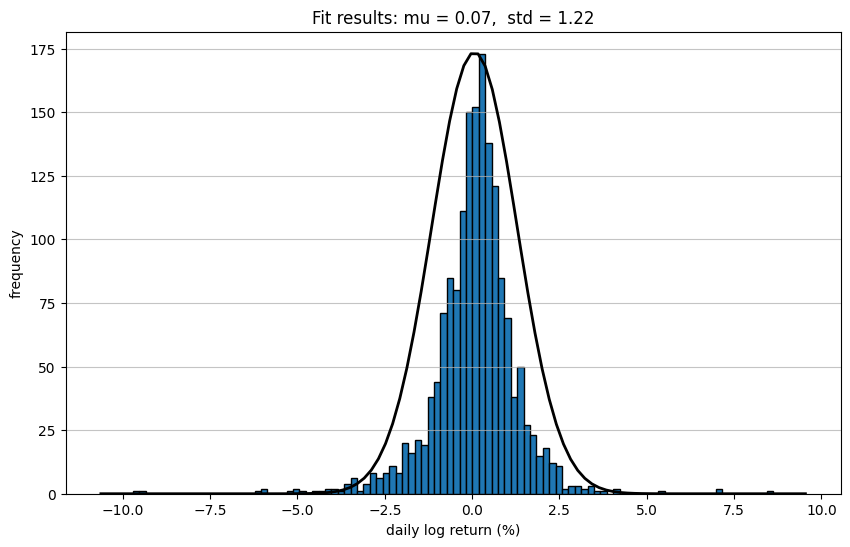

In [14]:
# 日次リターンの対数リターンのヒストグラムを表示
# 正規分布も重ねて表示
plt.figure(figsize=(10, 6))
plt.title('histogram of Daily Log Returns')
plt.xlabel('daily log return (%)')
plt.ylabel('frequency')  
plt.hist(df['日次対数リターン'].dropna(), bins=100, edgecolor='black')
plt.grid(axis='y', alpha=0.75)      
mu = df['日次対数リターン'].mean()  # 平均
sigma = df['日次対数リターン'].std()  # 標準偏差
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)      
plt.plot(x, p * max(np.histogram(df['日次対数リターン'].dropna(), bins=100)[0]) / max(p), 'k', linewidth=2)
plt.title('Fit results: mu = %.2f,  std = %.2f' % (mu, sigma))      
plt.show()  

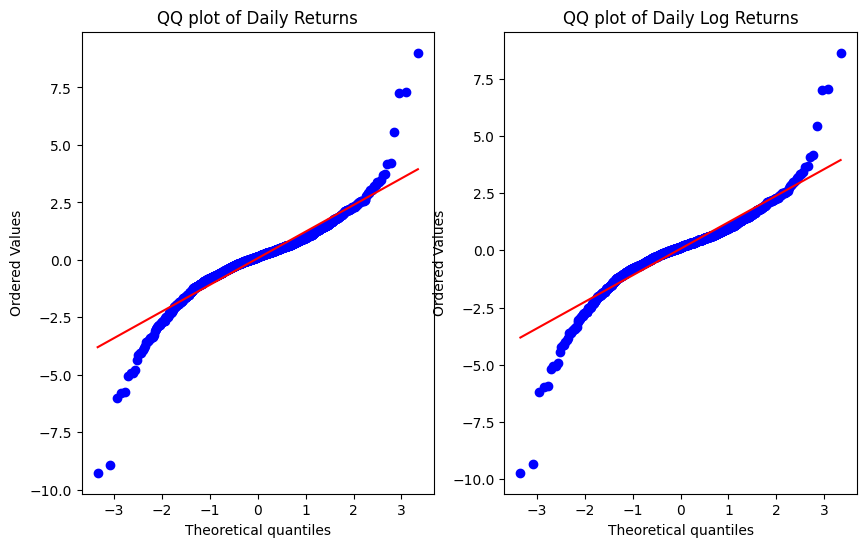

In [15]:
# 日次リターンと対数日次リターンのQQプロットを表示
import scipy.stats as stats
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
stats.probplot(df['日次リターン'].dropna(), dist="norm", plot=plt)
plt.title('QQ plot of Daily Returns')
plt.subplot(1, 2, 2)
stats.probplot(df['日次対数リターン'].dropna(), dist="norm", plot=plt)
plt.title('QQ plot of Daily Log Returns')
plt.show()